In [1]:
#importing the required packages
import pandas as pd
#import statistics as stat
import sys
#import math
from sklearn.model_selection import train_test_split
import pickle
#from sklearn.metrics import accuracy_score
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#function to calculate confusion matrix
def confusion_matrix(Y, pred):
    
    #variables to store TP, FN, FP, FN
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    
    for ind, lab in enumerate(Y):
        
        #when the predicted label and given label is same
        if lab == pred[ind]:
            if lab == 1:
                TP += 1
            else:
                TN += 1
        
        #when the predicted label and given label is not same
        else:
            if lab == 1:
                FN += 1
            else:
                FP += 1
                
    return [[TP, FN], [FP, TN]]

In [3]:
#function to calculate accuracy
def Accuracy(Y, pred):
    
    size = len(Y)
    
    #variable to store the number of records where predicted label and given label is same
    num_match = 0
    for index, lab in enumerate(Y):
        
        if lab == pred[index]:
            num_match += 1
    return num_match/size

In [4]:
#function to calculate precision
def Precision(Y, pred):
    
    #variables to store true positives and false positives
    TP = 0
    FP = 0
    
    for index, lab in enumerate(Y):
        
        if lab == 1.0 and pred[index] == 1.0:
            TP += 1
        elif lab == 0 and pred[index] == 1.0:
            FP += 1
    
    return TP/(TP + FP)

In [9]:
#function to calculate Recall
def Recall(Y, pred):
    TP = 0
    FN = 0
    for index, lab in enumerate(Y):
        
        if lab == 1.0 and pred[index] == 1.0:
            TP += 1
        elif lab == 1 and pred[index] == 0:
            FN += 1
    
    return TP/(TP + FN)

In [10]:
#function to calculate F1 score
def F1_Score(Y, pred):
    prec = Precision(Y, pred)
    reca = Recall(Y, pred)
    
    F1_score = (2*prec*reca)/(prec+reca)
    
    return F1_score

In [11]:
#importing the data
df = pd.read_csv(r"C:\Users\Bhavesh Kilaru\Desktop\CS5593-Data Mining\Project\Data\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
#printing the number of nulls in each attribute
print("The number of Nulls in each attribute is")
for col in df.columns:
    print(col + " "+ str(sum(df[col] == '?')))

The number of Nulls in each attribute is
class 0
cap-shape 0
cap-surface 0
cap-color 0
bruises 0
odor 0
gill-attachment 0
gill-spacing 0
gill-size 0
gill-color 0
stalk-shape 0
stalk-root 2480
stalk-surface-above-ring 0
stalk-surface-below-ring 0
stalk-color-above-ring 0
stalk-color-below-ring 0
veil-type 0
veil-color 0
ring-number 0
ring-type 0
spore-print-color 0
population 0
habitat 0


In [13]:
#function to replace null values in the data
#since all values are categorical, the null values will be replaced with mode

def replace_null_values(df):
    for col in df.columns:
        null_count = sum(df[col] == '?')
        if null_count > 0:
            col_mode = df[col].value_counts().idxmax()
            for ind, val in enumerate(df[col]):
                if val == "?":
                    df[col][ind] = col_mode
    return df

In [14]:
#replacing Nulls in data
df = replace_null_values(df)

#printing the number of nulls in data after replacement
print("The number of Nulls in data after replacement is")
for col in df.columns:
    print(col + " "+ str(sum(df[col] == '?')))

The number of Nulls in data after replacement is
class 0
cap-shape 0
cap-surface 0
cap-color 0
bruises 0
odor 0
gill-attachment 0
gill-spacing 0
gill-size 0
gill-color 0
stalk-shape 0
stalk-root 0
stalk-surface-above-ring 0
stalk-surface-below-ring 0
stalk-color-above-ring 0
stalk-color-below-ring 0
veil-type 0
veil-color 0
ring-number 0
ring-type 0
spore-print-color 0
population 0
habitat 0


In [15]:
#removing the column Veil-type as it contains only one unique value
#this is done as the it contains only one type of value
df = df.loc[:, df.columns != 'veil-type']

In [16]:
#function to convert categorical attributes to numerical i.e., label encoding
def label_encoder(col):
    get_unique = col.unique().tolist()
    label = []
    encoded_val = {}
    for uniq_val in get_unique:
        encoded_val[uniq_val] = get_unique.index(uniq_val)
    for val in col:
        label.append(get_unique.index(val))
    return label, encoded_val

In [17]:
#function to normalize attributes
def normalizer(col):
    min_val = min(col)
    max_val = max(col)
    normalized_vals = []
    for val in col:
        cal_val = (val - min_val)/(max_val - min_val)
        normalized_vals.append(cal_val)
    return normalized_vals

In [18]:
#encoding and normalizing data i.e, each attribute
#getting the encoded indices
encoded_indices = {}

for i in df.columns:
    df[i], temp = label_encoder(df[i])
    df[i] = normalizer(df[i])
    encoded_indices[i] = temp

print("The data after label encoding and normalization")
print(df.head())

The data after label encoding and normalization
   class  cap-shape  cap-surface  cap-color  bruises   odor  gill-attachment  \
0    0.0        0.0     0.000000   0.000000      0.0  0.000              0.0   
1    1.0        0.0     0.000000   0.111111      0.0  0.125              0.0   
2    1.0        0.2     0.000000   0.222222      0.0  0.250              0.0   
3    0.0        0.0     0.333333   0.222222      0.0  0.000              0.0   
4    1.0        0.0     0.000000   0.333333      1.0  0.375              0.0   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-above-ring  \
0           0.0        0.0    0.000000  ...                       0.0   
1           0.0        1.0    0.000000  ...                       0.0   
2           0.0        1.0    0.090909  ...                       0.0   
3           0.0        0.0    0.090909  ...                       0.0   
4           1.0        1.0    0.000000  ...                       0.0   

   stalk-surface-below-ring  sta

In [19]:
#printing the encoded value and the original value for each attribute
print("The encoded value for each attribute after normalization is")
print(encoded_indices)

The encoded value for each attribute after normalization is
{'class': {'p': 0, 'e': 1}, 'cap-shape': {'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5}, 'cap-surface': {'s': 0, 'y': 1, 'f': 2, 'g': 3}, 'cap-color': {'n': 0, 'y': 1, 'w': 2, 'g': 3, 'e': 4, 'p': 5, 'b': 6, 'u': 7, 'c': 8, 'r': 9}, 'bruises': {'t': 0, 'f': 1}, 'odor': {'p': 0, 'a': 1, 'l': 2, 'n': 3, 'f': 4, 'c': 5, 'y': 6, 's': 7, 'm': 8}, 'gill-attachment': {'f': 0, 'a': 1}, 'gill-spacing': {'c': 0, 'w': 1}, 'gill-size': {'n': 0, 'b': 1}, 'gill-color': {'k': 0, 'n': 1, 'g': 2, 'p': 3, 'w': 4, 'h': 5, 'u': 6, 'e': 7, 'b': 8, 'r': 9, 'y': 10, 'o': 11}, 'stalk-shape': {'e': 0, 't': 1}, 'stalk-root': {'e': 0, 'c': 1, 'b': 2, 'r': 3}, 'stalk-surface-above-ring': {'s': 0, 'f': 1, 'k': 2, 'y': 3}, 'stalk-surface-below-ring': {'s': 0, 'f': 1, 'y': 2, 'k': 3}, 'stalk-color-above-ring': {'w': 0, 'g': 1, 'p': 2, 'n': 3, 'b': 4, 'e': 5, 'o': 6, 'c': 7, 'y': 8}, 'stalk-color-below-ring': {'w': 0, 'p': 1, 'g': 2, 'b': 3, 'n': 4, 'e': 5

In [20]:
encoded_indices

{'class': {'p': 0, 'e': 1},
 'cap-shape': {'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5},
 'cap-surface': {'s': 0, 'y': 1, 'f': 2, 'g': 3},
 'cap-color': {'n': 0,
  'y': 1,
  'w': 2,
  'g': 3,
  'e': 4,
  'p': 5,
  'b': 6,
  'u': 7,
  'c': 8,
  'r': 9},
 'bruises': {'t': 0, 'f': 1},
 'odor': {'p': 0,
  'a': 1,
  'l': 2,
  'n': 3,
  'f': 4,
  'c': 5,
  'y': 6,
  's': 7,
  'm': 8},
 'gill-attachment': {'f': 0, 'a': 1},
 'gill-spacing': {'c': 0, 'w': 1},
 'gill-size': {'n': 0, 'b': 1},
 'gill-color': {'k': 0,
  'n': 1,
  'g': 2,
  'p': 3,
  'w': 4,
  'h': 5,
  'u': 6,
  'e': 7,
  'b': 8,
  'r': 9,
  'y': 10,
  'o': 11},
 'stalk-shape': {'e': 0, 't': 1},
 'stalk-root': {'e': 0, 'c': 1, 'b': 2, 'r': 3},
 'stalk-surface-above-ring': {'s': 0, 'f': 1, 'k': 2, 'y': 3},
 'stalk-surface-below-ring': {'s': 0, 'f': 1, 'y': 2, 'k': 3},
 'stalk-color-above-ring': {'w': 0,
  'g': 1,
  'p': 2,
  'n': 3,
  'b': 4,
  'e': 5,
  'o': 6,
  'c': 7,
  'y': 8},
 'stalk-color-below-ring': {'w': 0,
  'p': 1,
 

In [16]:
list(encoded_indices)[1:]

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [17]:
#normalizing indices
def normalize_indices(encoded):
    
    for key in encoded.keys():
        min_val = min(encoded[key].values())
        max_val = max(encoded[key].values())
        
        for i in encoded[key].keys():
            encoded[key][i] = (encoded[key][i] - min_val)/(max_val - min_val)
            
    return encoded
        
encoded_indices = normalize_indices(encoded_indices)
print("The valuees of each catgeory after normalizing ")
print(encoded_indices)

The valuees of each catgeory after normalizing 
{'class': {'p': 0.0, 'e': 1.0}, 'cap-shape': {'x': 0.0, 'b': 0.2, 's': 0.4, 'f': 0.6, 'k': 0.8, 'c': 1.0}, 'cap-surface': {'s': 0.0, 'y': 0.3333333333333333, 'f': 0.6666666666666666, 'g': 1.0}, 'cap-color': {'n': 0.0, 'y': 0.1111111111111111, 'w': 0.2222222222222222, 'g': 0.3333333333333333, 'e': 0.4444444444444444, 'p': 0.5555555555555556, 'b': 0.6666666666666666, 'u': 0.7777777777777778, 'c': 0.8888888888888888, 'r': 1.0}, 'bruises': {'t': 0.0, 'f': 1.0}, 'odor': {'p': 0.0, 'a': 0.125, 'l': 0.25, 'n': 0.375, 'f': 0.5, 'c': 0.625, 'y': 0.75, 's': 0.875, 'm': 1.0}, 'gill-attachment': {'f': 0.0, 'a': 1.0}, 'gill-spacing': {'c': 0.0, 'w': 1.0}, 'gill-size': {'n': 0.0, 'b': 1.0}, 'gill-color': {'k': 0.0, 'n': 0.09090909090909091, 'g': 0.18181818181818182, 'p': 0.2727272727272727, 'w': 0.36363636363636365, 'h': 0.45454545454545453, 'u': 0.5454545454545454, 'e': 0.6363636363636364, 'b': 0.7272727272727273, 'r': 0.8181818181818182, 'y': 0.90909

In [18]:
encoded_indices

{'class': {'p': 0.0, 'e': 1.0},
 'cap-shape': {'x': 0.0, 'b': 0.2, 's': 0.4, 'f': 0.6, 'k': 0.8, 'c': 1.0},
 'cap-surface': {'s': 0.0,
  'y': 0.3333333333333333,
  'f': 0.6666666666666666,
  'g': 1.0},
 'cap-color': {'n': 0.0,
  'y': 0.1111111111111111,
  'w': 0.2222222222222222,
  'g': 0.3333333333333333,
  'e': 0.4444444444444444,
  'p': 0.5555555555555556,
  'b': 0.6666666666666666,
  'u': 0.7777777777777778,
  'c': 0.8888888888888888,
  'r': 1.0},
 'bruises': {'t': 0.0, 'f': 1.0},
 'odor': {'p': 0.0,
  'a': 0.125,
  'l': 0.25,
  'n': 0.375,
  'f': 0.5,
  'c': 0.625,
  'y': 0.75,
  's': 0.875,
  'm': 1.0},
 'gill-attachment': {'f': 0.0, 'a': 1.0},
 'gill-spacing': {'c': 0.0, 'w': 1.0},
 'gill-size': {'n': 0.0, 'b': 1.0},
 'gill-color': {'k': 0.0,
  'n': 0.09090909090909091,
  'g': 0.18181818181818182,
  'p': 0.2727272727272727,
  'w': 0.36363636363636365,
  'h': 0.45454545454545453,
  'u': 0.5454545454545454,
  'e': 0.6363636363636364,
  'b': 0.7272727272727273,
  'r': 0.81818181818

In [19]:
#getting the X and Y values from data frame
X = df.loc[:, df.columns != 'class']
Y = df['class']

In [20]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = 0.2)

In [21]:
#converting the dataframe into arrays

#for training data
X_train_arr = np.array(X_train)
num_train_records = X_train_arr.shape[0]
Y_train_arr = np.array(Y_train)
Y_train_arr = np.reshape(Y_train_arr, (num_train_records, 1))

#for test data
X_test_arr = np.array(X_test)
num_test_records = X_test_arr.shape[0]
Y_test_arr = np.array(Y_test)
Y_test_arr = np.reshape(Y_test_arr, (num_test_records, 1))

In [22]:
#class to calculates the K nearest neighbor
class KNN():
    
    def __init__(self, num_neighbors = 5):
        self.neighbors = num_neighbors
        self.X_train = None
        self.Y_train = None
    
    #for storing the data
    def fit(self, X_train, Y_train):
        self.X_train = X_train.values
        self.Y_train = Y_train.values
    
    #prediction using KNN
    def predict(self, test):
        
        #to check if data is a dataframe or an array
        if isinstance(test, pd.DataFrame):
            X_test = test.values
        else:
            X_test = test
        y_predicted = []

        #predicting the the label for for each test example
        for test_ex in X_test:

            label_pred = self.finding_nearest_neighbors(self.X_train, self.Y_train, test_ex, self.neighbors)

            y_predicted.append(label_pred)

        return y_predicted
    
    #finding the label of an example
    def finding_nearest_neighbors(self, X_train, Y_train, test_ex, num_neighbors):
        
        #calculating the distance from each training example
        distances = self.distance_caluculator(X_train, test_ex)

        #fetching the K nearest neighbors
        nearest_neighbors = self.n_nearest_neighbors_finder(distances, num_neighbors)

        #getting the label of the example
        predicted_label = self.label_caluculator(nearest_neighbors , Y_train)

        return predicted_label

    #finding the indices of k nearest neighbors
    def n_nearest_neighbors_finder(self, distances, num_neighbors):

        nearest_neighbor_indices = []

        #sorting the distances
        smallest_distances = sorted(distances)[:num_neighbors]

        for short_dist in smallest_distances:

            nearest_neighbor_indices.append(distances.index(short_dist))

        return nearest_neighbor_indices

    #calculating the label from k near neighbors
    def label_caluculator(self, nearest_neighbors , Y_train):

        nearest_labels = []
        
        #fetching thelabels of k nearest neighbors
        for ind in nearest_neighbors:

            nearest_labels.append(Y_train[ind])

        ones_count = nearest_labels.count(1)
        zeros_count = nearest_labels.count(0)

        #getting the majority vote
        if ones_count > zeros_count:
            predicted_label = 1
        else:
            predicted_label = 0

        return predicted_label

    #calculating the distances from all records in training set to a test example
    def distance_caluculator(self, X_train, test_ex):

        distances = []

        for train_ex in X_train:
            
            #calculating the distance
            dist = np.sqrt(np.sum(np.square(train_ex - test_ex)))

            distances.append(dist)

        return distances

In [54]:
#creating the Knn classifier
clf_Knn = KNN(num_neighbors = 5)

#training the model
clf_Knn.fit(X_train, Y_train)

#prediction on test data
y_pred_KNN= clf_Knn.predict(X_test)

In [55]:
#printing the confusion matrix for KNN
confusion_matrix_KNN = confusion_matrix(Y_test, y_pred_KNN)
print("The confusion matrix for KNN when k = 2 is ", confusion_matrix_KNN)

The confusion matrix for KNN when k = 2 is  [[848, 0], [0, 777]]


In [56]:
#calculating the metrics for KNN
accuracy_Knn = Accuracy(Y_test, y_pred_KNN)
precision_Knn = Precision(Y_test, y_pred_KNN)
recall_Knn = Recall(Y_test, y_pred_KNN)
F1_Knn = F1_Score(Y_test, y_pred_KNN)
print(f"The accuracy of mushroom classification on test data using knn when K = 5 is {accuracy_Knn}")
print(f"The Precision of mushroom classification on test data using knn when K = 5 is {precision_Knn}")
print(f"The Recall of mushroom classification on test data using knn when K = 5 is {recall_Knn}")
print(f"The F1 score of mushroom classification on test data using knn when K = 5 is {F1_Knn}")

The accuracy of mushroom classification on test data using knn when K = 2 is 1.0
The Precision of mushroom classification on test data using knn when K = 2 is 1.0
The Recall of mushroom classification on test data using knn when K = 2 is 1.0
The F1 score of mushroom classification on test data using knn when K = 2 is 1.0


In [48]:
#Logistic Regression
class Logistic_Regression_Classifier():
    
    def __init__(self, learning_rate = 0.01, num_episodes = 1000):
        self.learning_rate = learning_rate
        self.num_episodes = num_episodes
        self.weights = None
        self.bias = np.float("0")
        self.cost = []
    
    #training the model
    def fit(self, X_train, Y_train):
        num_attributes = X_train.shape[1]
        self.weights = np.zeros((1, num_attributes))
        
        self.propagate(X_train, Y_train)
    
    #sigmoid function
    def sigmoid(self, X, w, b):
        z = np.dot(X, w.T) + b
        s = 1 / (1 + np.exp(-z))
        return s
    
    #predicting the labels and adjusting the weights
    def propagate(self, X_train, Y_train):
        
        m = X_train.shape[0]
        
        for i in range(self.num_episodes):
            
            #forward propagation - predicting for training examples
            y_predicted = self.sigmoid(X_train, self.weights, self.bias)
            
            #cost during an epoch
            temp_cost = (-(Y_train * np.log(y_predicted)) - ((1-Y_train)*np.log(1- y_predicted))).mean()
            
            self.cost.append(temp_cost)
            
            if i % 100 == 0:
                
                print(f"After {i} episodes, the cost is {temp_cost}")
            
            #gradient descent - change in weights and bias
            dw, db = self.gradient_descent(X_train, Y_train, y_predicted, m)
            
            #changing the weights
            self.weights -= self.learning_rate * dw.T
            
            #changing the bias
            self.bias -= self.learning_rate * db
    
    #gradient descent - to get the change in weights and bias
    def gradient_descent(self, X_train, Y_train, Y_predicted, m):
        
        dz = Y_predicted - Y_train
        
        dw = (1/m) * np.dot(X_train.T, dz)
        
        db = (1/m)*np.sum(dz)
        
        return dw, db
            
    #for predicting an example        
    def predict(self, X):
        
        y_pred = self.sigmoid(X, self.weights, self.bias).round()
        
        return y_pred
    
    #for plotting the cost
    def plot_cost(self):
        
        plt.plot(range(self.num_episodes), self.cost)
        plt.xlabel("Number of epochs")
        plt.ylabel("Cost")
        #plt.title(f"number of epochs vs Cost for Logistic Regression when number of epochs is {self.num_episodes} and learning rate is {self.learning_rate}")
        plt.title("number of epochs vs Cost for Logistic Regression")

In [49]:
#creating the logistic regression classifier
LR_clf = Logistic_Regression_Classifier(num_episodes = 10000, learning_rate = 0.05)

#training the model
LR_clf.fit(X_train_arr, Y_train_arr)

#predicting the test dara
Y_pred_LR = LR_clf.predict(X_test_arr)

C:\Users\Bhavesh Kilaru\AppData\Local\Temp\ipykernel_89252\3714523605.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.bias = np.float("0")


After 0 episodes, the cost is 0.6931471805599453
After 100 episodes, the cost is 0.47750465582879953
After 200 episodes, the cost is 0.3873954206782888
After 300 episodes, the cost is 0.34027453380449635
After 400 episodes, the cost is 0.31121845093191386
After 500 episodes, the cost is 0.2911412347782134
After 600 episodes, the cost is 0.2761277038603135
After 700 episodes, the cost is 0.2642586897606963
After 800 episodes, the cost is 0.25449481408416463
After 900 episodes, the cost is 0.24622660751321312
After 1000 episodes, the cost is 0.2390726252650657
After 1100 episodes, the cost is 0.23278075869422452
After 1200 episodes, the cost is 0.22717651220734006
After 1300 episodes, the cost is 0.2221342740204896
After 1400 episodes, the cost is 0.21756054866592944
After 1500 episodes, the cost is 0.21338373997227778
After 1600 episodes, the cost is 0.2095476834576188
After 1700 episodes, the cost is 0.2060074097630125
After 1800 episodes, the cost is 0.20272628238825277
After 1900 epi

In [50]:
#printing the confusion matrix for logistic regression
confusion_matrix_LR = confusion_matrix(Y_test, Y_pred_LR)
print("The confusion matrix for Logistic Regression is ", confusion_matrix_LR)

The confusion matrix for Logistic Regression is  [[795, 53], [35, 742]]


In [51]:
from sklearn.metrics import confusion_matrix as CM
CM(Y_test, Y_pred_LR)

array([[742,  35],
       [ 53, 795]], dtype=int64)

In [52]:
#calculating the metrics for Logistic Regression
accuracy_LR = Accuracy(Y_test, Y_pred_LR)
precision_LR = Precision(Y_test, Y_pred_LR)
recall_LR = Recall(Y_test, Y_pred_LR)
F1_LR = F1_Score(Y_test, Y_pred_LR)
print(f"The accuracy of mushroom classification on test data using Logistic Regression is {accuracy_LR}")
print(f"The Precision of mushroom classification on test data using Logistic Regression when K = 2 is {precision_LR}")
print(f"The Recall of mushroom classification on test data using Logistic Regression when K = 2 is {recall_LR}")
print(f"The F1 score of mushroom classification on test data using Logistic Regression when K = 2 is {F1_LR}")

The accuracy of mushroom classification on test data using Logistic Regression is 0.9458461538461539
The Precision of mushroom classification on test data using Logistic Regression when K = 2 is 0.9578313253012049
The Recall of mushroom classification on test data using Logistic Regression when K = 2 is 0.9375
The F1 score of mushroom classification on test data using Logistic Regression when K = 2 is 0.9475566150178785


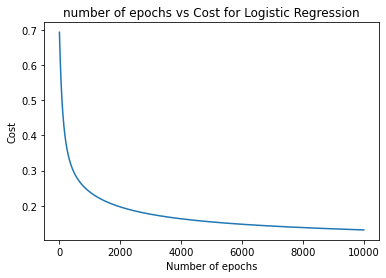

In [53]:
LR_clf.plot_cost()

In [32]:
#class that implements deep network
class DeepNeuralNetwork():
    def __init__(self, sizes, batch_size = 100, epochs=10, learning_rate = 0.1):
        self.sizes = sizes
        self.batch_size = batch_size
        self.l_rate = learning_rate
        self.epochs = epochs
        self.loss = []
        
        # Save all weights
        self.params = self.initialize()
        # Save all intermediate values, i.e. activations
        self.cache = {}
        
    #method to calculate sigmoid and its derivative
    def sigmoid(self, x, derivative=False):
        '''
            Forward path:
            σ(x) = 1 / 1+exp(-z)
            
            Backward path:
            ∇σ(x) = exp(-z) / (1+exp(-z))^2
        '''
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))
    
    #to initialize weights - weights with random number and bias with zero
    def initialize(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_layer=self.sizes[1]
        output_layer=self.sizes[2]
        
        params = {
            "W1": np.random.randn(hidden_layer, input_layer) * 0.01,
            "b1": np.zeros((hidden_layer, 1)) * np.sqrt(1./input_layer),
            "W2": np.random.randn(output_layer, hidden_layer) * 0.01,
            "b2": np.zeros((output_layer, 1)) * np.sqrt(1./hidden_layer)
        }
        return params
    
    #feed forward
    def feed_forward(self, x):
        '''
            y = σ(wX + b)
        '''
        self.cache["X"] = x
        self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
        self.cache["A1"] = self.sigmoid(self.cache["Z1"])
        self.cache["Z2"] = np.matmul(self.params["W2"], self.cache["A1"]) + self.params["b2"]
        self.cache["A2"] = self.sigmoid(self.cache["Z2"])
        return self.cache["A2"]
    
    #backward propagation - to get the change in weights and bias for each layer
    def back_propagate(self, y, output):
        '''
            This is the backpropagation algorithm, for calculating the updates
            of the neural network's parameters.
        '''
        current_batch_size = y.shape[0]
        
        #for output layer
        dZ2 = output - y.T
        dW2 = (1./current_batch_size) * np.matmul(dZ2, self.cache["A1"].T)
        db2 = (1./current_batch_size) * np.sum(dZ2, axis=1, keepdims=True)
        
        #for hidden layer
        dA1 = np.matmul(self.params["W2"].T, dZ2)
        dZ1 = dA1 * self.sigmoid(self.cache["Z1"], derivative=True)
        dW1 = (1./current_batch_size) * np.matmul(dZ1, self.cache["X"])
        db1 = (1./current_batch_size) * np.sum(dZ1, axis=1, keepdims=True)

        self.grads = {"W1": dW1, "b1": db1, "W2": dW2, "b2": db2}
        return self.grads
    
    #method to get the loss
    def cross_entropy_loss(self, y, output):
        '''
            L(y, ŷ) = −∑ylog(ŷ).
        '''
        l_sum = np.sum(np.multiply(y.T, np.log(output)))
        m = y.shape[0]
        l = -(1./m) * l_sum
        return l
    
    #stochastic gradient descent - to adjust weights and bias
    def sgd(self, l_rate):
        '''
            Stochatic Gradient Descent (SGD):
            θ^(t+1) <- θ^t - η∇L(y, ŷ)
        '''
        for key in self.params:
                self.params[key] = self.params[key] - l_rate * self.grads[key]
    
    #method to get the accuracy
    def accuracy(self, y, output):
        return np.mean(np.argmax(y, axis=-1) == np.argmax(output.T, axis=-1))

    #method to train the network
    def train(self, x_train, y_train, epochs, batch_size, l_rate):
        
        # Hyperparameters
        self.epochs = epochs
        self.batch_size = batch_size
        num_batches = x_train.shape[0] // self.batch_size
        
        start_time = time.time()
        template = "Epoch {}: {:.2f}s, train acc={:.2f}, train loss={:.2f}"
        
        # Train
        for i in range(self.epochs):
            # Shuffling the training data
            permutation = np.random.permutation(x_train.shape[0])
            x_train_shuffled = x_train[permutation]
            y_train_shuffled = y_train[permutation]

            for j in range(num_batches):
                
                # Getting the batch
                begin = j * self.batch_size
                end = min(begin + self.batch_size, x_train.shape[0]-1)
                x = x_train_shuffled[begin:end]
                y = y_train_shuffled[begin:end]
                
                # Forward
                output = self.feed_forward(x)
                # Backpropagating for adjusting the weights
                grad = self.back_propagate(y, output)
                # Optimize
                self.sgd(l_rate=l_rate)

            # Evaluate performance
            # Training data
            output = self.feed_forward(x_train)
            train_acc = self.accuracy(y_train, output)
            train_loss = self.cross_entropy_loss(y_train, output)
            self.loss.append(train_loss)
            if i % 100 == 0:
                print(template.format(i+1, time.time()-start_time, train_acc, train_loss))
            
    #training the model        
    def fit(self, x_train, y_train):
        self.train(x_train, y_train, self.epochs, self.batch_size, self.l_rate)
    
    #to predict an example
    def predict(self, x_test):
        output = self.feed_forward(x_test)
        return output[1].round()
    
    #for plotting the loss
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Number of epochs")
        plt.ylabel("loss")
        plt.title("Number of epochs vs loss for Artificial neural network classifier")

In [33]:
#one hot encoder
def one_hot(x, k, dtype=np.float32):
    """Create a one-hot encoding of x of size k."""
    return np.array(x[:, None] == np.arange(k), dtype)

Y_train_one_hot = one_hot(Y_train.astype('int32'), 2)

C:\Users\Bhavesh Kilaru\AppData\Local\Temp\ipykernel_89252\786653118.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return np.array(x[:, None] == np.arange(k), dtype)


In [34]:
#creating the Deep Neural network object
ANN_Clf = DeepNeuralNetwork(sizes=[X.shape[1], 10, 2], epochs = 500)

#training the model
ANN_Clf.fit(X_train_arr, Y_train_one_hot)

Epoch 1: 0.04s, train acc=0.52, train loss=0.69
Epoch 101: 2.08s, train acc=0.98, train loss=0.07
Epoch 201: 4.13s, train acc=1.00, train loss=0.03
Epoch 301: 6.20s, train acc=1.00, train loss=0.01
Epoch 401: 8.24s, train acc=1.00, train loss=0.01


In [35]:
#predicting the test data using KNN
pred_Ann = ANN_Clf.predict(X_test_arr)

In [36]:
confusion_matrix(Y_test, pred_Ann)

[[848, 0], [0, 777]]

In [37]:
#confusion matrix for ANN
confusion_matrix_ANN = confusion_matrix(Y_test, pred_Ann)
print("The confusion matrix for ANN is ", confusion_matrix_ANN)

The confusion matrix for ANN is  [[848, 0], [0, 777]]


In [38]:
#calculating the metrics for Artificial Neural Networks
accuracy_ANN = Accuracy(Y_test, pred_Ann)
precision_ANN = Precision(Y_test, pred_Ann)
recall_ANN = Recall(Y_test, pred_Ann)
F1_ANN = F1_Score(Y_test, pred_Ann)
print(f"The accuracy of mushroom classification on test data using Artificial Neural Networks classifier is {accuracy_ANN}")
print(f"The Precision of mushroom classification on test data using Artificial Neural Networks classifier  is {precision_ANN}")
print(f"The Recall of mushroom classification on test data using Artificial Neural Networks classifier  is {recall_ANN}")
print(f"The F1 score of mushroom classification on test data using Artificial Neural Networks classifier is {F1_ANN}")

The accuracy of mushroom classification on test data using Artificial Neural Networks classifier is 1.0
The Precision of mushroom classification on test data using Artificial Neural Networks classifier  is 1.0
The Recall of mushroom classification on test data using Artificial Neural Networks classifier  is 1.0
The F1 score of mushroom classification on test data using Artificial Neural Networks classifier is 1.0


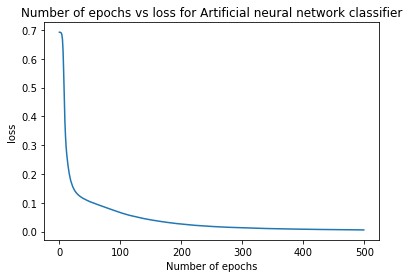

In [39]:
#plotting the loss for ANN
ANN_Clf.plot_loss()

In [40]:
#class to represent node in the decision trees
class node():
    
    def __init__(self, value = None, right_child = None, left_child = None, 
                 info_gain = None, feature_num = None, threshold = None):
        
        #in case of leaf node
        self.value = value
        
        #in case if node is a tree
        self.right_child = right_child
        self.left_child = left_child
        self.info_gain = info_gain
        self.feature_num = feature_num
        self.threshold = threshold

In [41]:
#class for decision tree
class Decision_Tree_Classifier():
    
    def __init__(self, criterion = "gini", max_depth = 2, min_samples_split = 2):
        self.root = None
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
    
    #method to calculate entropy
    def entropy(self, y):
        
        unique_val = np.unique(y)
        total_length = len(y)
        entropy = 0
        for cls in unique_val:
            prob = len(y[y == cls]) / total_length
            entropy += -prob * np.log2(prob)
        return entropy
    
    #method to calculate Gini Index
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        total_length = len(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / total_length
            gini += p_cls**2
        return 1 - gini
    
    #method to calculate information gain
    def info_gain(self, criterion, root, right_child, left_child):
        
        parent_length = len(root)
        right_weight = len(right_child)/parent_length
        left_weight = len(left_child)/parent_length
        
        if criterion == 'gini':
            
            r_child_value = self.gini_index(right_child)
            l_child_value = self.gini_index(left_child)
            root_value    = self.gini_index(root)
            
        else:
            
            r_child_value = self.entropy(right_child)
            l_child_value = self.entropy(left_child)
            root_value    = self.entropy(root)
        #print(root_value, right_weight, r_child_value, left_child, l_child_value)
        info_gain = root_value - (right_weight * r_child_value) - (left_weight * l_child_value)
        #print(info_gain)
        return info_gain
    
    #method to split the attribute based on athreshold
    def split(self, data, attribute_num, threshold):
        
        right_data = []
        left_data = []
        
        for row in data:
            
            if row[attribute_num] > threshold:
                
                right_data.append(row)
                
            else:
                
                left_data.append(row)
                
        return np.array(left_data), np.array(right_data)
    
    #method to get the best split anong the possible splits
    def get_best_split(self, data, num_features):
        
        best_split_info = {}
        max_info_gain = -float("inf")
        
        for feature in range(num_features):
            
            feature_data = data[:, feature]
            
            #getting the unique values in the attribute
            unique_val = np.unique(feature_data)
            
            for threshold in unique_val:
                
                #splitting the data using the given threshold
                left_data, right_data = self.split(data, feature, threshold)
                
                if len(left_data) > 0 and len(right_data) > 0:
                    
                    #print(np.shape(data), np.shape(left_data), np.shape(right_data))
                    
                    label, left_label, right_label = data[:, -1], left_data[:, -1], right_data[:, -1]
                    
                    #calculating the info gain for the current split
                    current_info_gain = self.info_gain(self.criterion, label, left_label, right_label)
                    #print(current_info_gain)
                    if current_info_gain > max_info_gain:
                        
                        max_info_gain = current_info_gain
                        best_split_info['info_gain'] = current_info_gain
                        
                        best_split_info['best_feature'] = feature
                        best_split_info['threshold'] = threshold
                        
                        best_split_info['right_child'] = right_data
                        best_split_info['left_child']  = left_data
                        
        return best_split_info  
    
    #creating the tree
    def build_tree(self, data, depth = 0):
        
        Labels = data[:, -1]
        
        num_ex, num_features = np.shape(data[:, :-1])
        
        if depth <= self.max_depth and num_ex >= self.min_samples_split:
            
            best_split =  self.get_best_split(data, num_features)
            
            if best_split['info_gain'] > 0:
                
                left_child = self.build_tree(best_split['left_child'], depth + 1)
                right_child = self.build_tree(best_split['right_child'], depth + 1)
                
                return node(None, right_child, left_child, best_split['info_gain'], best_split['best_feature'], best_split['threshold'])
        
        return node(self.leaf_value_caluculator(Labels))
    
    #calculating the label in the leaf
    def leaf_value_caluculator(self, Y):
        
        unique_vals = np.unique(Y)
        
        majority_vote = -1
        leaf_value = None
        
        for val in unique_vals:
            
            cnt =np.sum(Y == val)
            
            #getting the majority vote
            if cnt > majority_vote:
                leaf_value = val
                majority_vote = cnt
                
        return leaf_value
    
    
    #training the model
    def fit(self, X, Y):
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    #predicting - traversing through the tree
    def predict(self, X):
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    #predicting a data point
    def make_prediction(self, x, tree):
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_num]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left_child)
        else:
            return self.make_prediction(x, tree.right_child)
    
    #printing the tree
    def print_tree(self, tree=None, indent=" "):
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_num), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left_child, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right_child, indent + indent)

In [42]:
#creating the decision tree object
start = time.time()
classifier_DT = Decision_Tree_Classifier(criterion = "entropy", min_samples_split=2,  max_depth=5)

#training the decision tree
classifier_DT.fit(X_train_arr,Y_train_arr)

end = time.time()
print(end - start)

3.592580556869507


In [43]:
#prediction on testing data
pred_DT = classifier_DT.predict(X_test_arr)

In [44]:
#confusion matrix for Decision Trees
confusion_matrix_DT = confusion_matrix(Y_test, pred_DT)
print("The confusion matrix for Decision trees is ", confusion_matrix_DT)

The confusion matrix for Decision trees is  [[848, 0], [3, 774]]


In [45]:
CM(Y_test, pred_DT)

array([[774,   3],
       [  0, 848]], dtype=int64)

In [46]:
#calculating the metrics for Decision Trees
accuracy_DT = Accuracy(Y_test, pred_DT)
precision_DT = Precision(Y_test, pred_DT)
recall_DT = Recall(Y_test, pred_DT)
F1_DT = F1_Score(Y_test, pred_DT)
print(f"The accuracy of mushroom classification on test data using Decision Trees is {accuracy_DT}")
print(f"The Precision of mushroom classification on test data using Decision Trees  is {precision_DT}")
print(f"The Recall of mushroom classification on test data using Decision Trees  is {recall_DT}")
print(f"The F1 score of mushroom classification on test data using Decision Trees is {F1_DT}")

The accuracy of mushroom classification on test data using Decision Trees is 0.9981538461538462
The Precision of mushroom classification on test data using Decision Trees  is 0.9964747356051704
The Recall of mushroom classification on test data using Decision Trees  is 1.0
The F1 score of mushroom classification on test data using Decision Trees is 0.998234255444379
